In [4]:
import sys
from matplotlib import pyplot as plt


In [5]:
class rocket_sensor_data_log:
    def __init__(self, time, t_t1, t_t2, c_t1, c_t2, c_t3, t_p1, t_p2, t_p, t_l, t1):
        self.time = time

        self.t_t1 = t_t1
        self.t_t2 = t_t2

        self.c_t1 = c_t1
        self.c_t2 = c_t2
        self.c_t3 = c_t3

        self.t_p1 = t_p1
        self.t_p2 = t_p2

        self.t_p = t_p

        self.t_l = t_l

        self.t1 = t1

sensor_data_arr = []

In [6]:
class msg_sent_log:
    def __init__(self, time, cmd, id, size, data):
        self.time = time
        self.cmd = cmd
        self.id = id
        self.size = size
        
        self.data = []
        for i in data: self.data.append(i)

msg_sent_arr = []

In [7]:
class state_change_log:
    def __init__(self, time, state):
        self.time = time
        self.state = state

state_change_arr = []

In [8]:
SENSOR_READING = 0
MSG_RECEIVED = 1
MSG_SENT = 2
SYSTEM_ERROR = 3
STATE_CHANGE = 4
EVENT_REACTION = 5

In [47]:
buff = []
with open("log.bin", 'rb') as f:
    buff.append(f.read())
buff = buff[0]

#print(buff)
for x in buff: print(hex(x))

0x1
0x0
0x0
0x6
0x1c
0x0
0x2
0x1a
0x0
0x1
0x7
0x1
0x4
0x1
0xb
0x1
0x27
0x1
0xb
0x0
0x0
0x0
0x0
0x1
0x4
0x1
0x7
0x0
0x1
0x8e
0xff
0xff
0xff
0xff
0x1
0x0
0x0
0xa
0x4
0x0
0x2
0x1a
0x0
0x1
0x7
0x1
0x5
0x1
0x9
0x1
0x24
0x1
0x9
0x0
0x0
0x0
0x0
0x1
0x4
0x1
0x7
0x0
0x1
0x8f
0xff
0xff
0xff
0xff
0x1
0x0
0x0
0xd
0xee
0x0
0x2
0x1a
0x0
0x1
0x7
0x1
0x5
0x1
0xe
0x1
0x27
0x1
0xe
0x0
0x0
0x0
0x0
0x1
0x4
0x1
0x7
0x0
0x1
0x8e
0xff
0xff
0xff
0xff
0x1
0x0
0x0
0x11
0xd7
0x0
0x2
0x1a
0x0
0x1
0x7
0x1
0x5
0x1
0xb
0x1
0x24
0x1
0x6
0x0
0x0
0x0
0x0
0x1
0x4
0x1
0x7
0x0
0x1
0x8e
0xff
0xff
0xff
0xff
0x1
0x0
0x0
0x12
0xc9
0x13
0x0
0x1a
0x0
0x1
0x7
0x1
0x5
0x1
0xb
0x1
0x24
0x1
0x6
0x0
0x0
0x0
0x0
0x1
0x4
0x1
0x7
0x0
0x1
0x8e
0xff
0xff
0xff
0xff
0x1
0x0
0x0
0x12
0xe1
0x0
0x2
0x1a
0x1
0x1
0x7
0x1
0x5
0x1
0xb
0x1
0x24
0x1
0xe
0x0
0x0
0x0
0x0
0x1
0x4
0x1
0x7
0x0
0x1
0x8e
0xff
0xff
0xff
0xff
0x1
0x0
0x0
0x13
0x1d
0x0
0x2
0x1a
0x1
0x1
0x7
0x1
0x5
0x1
0xb
0x1
0x24
0x1
0xe
0x0
0x0
0x0
0x0
0x1
0x5
0x1
0x7
0x0
0x1
0x8e
0xff
0xf

In [48]:
sensor_data_arr = []
msg_sent_arr = []
state_change_arr = []

sensor_count = 0
msg_count = 0
state_count = 0

index = 0
while True:
    if index >= len(buff): break

    if(buff[index] == SENSOR_READING):
        sensor_count += 1
        time = int.from_bytes(buff[index + 1 : index + 5], byteorder='big', signed=True) 

        t_t1 = int.from_bytes(buff[index + 5 : index + 7], byteorder='big', signed=True) 
        t_t2 = int.from_bytes(buff[index + 7 : index + 9], byteorder='big', signed=True)

        c_t1 = int.from_bytes(buff[index + 9 : index + 11], byteorder='big', signed=True)
        c_t2 = int.from_bytes(buff[index + 11 : index + 13], byteorder='big', signed=True)
        c_t3 = int.from_bytes(buff[index + 13 : index + 15], byteorder='big', signed=True)

        t_p1 = int.from_bytes(buff[index + 15 : index + 17], byteorder='big', signed=True)
        t_p2 = int.from_bytes(buff[index + 17 : index + 19], byteorder='big', signed=True)

        t_p = int.from_bytes(buff[index + 19 : index + 21], byteorder='big', signed=True)
        t_l = int.from_bytes(buff[index + 21 : index + 23], byteorder='big', signed=True)

        tactile = int.from_bytes(buff[index + 23 : index + 24], byteorder='big', signed=True)

        sensor_data_arr.append(rocket_sensor_data_log(time, t_t1, t_t2, c_t1, c_t2, c_t3, t_p1, t_p2, t_p, t_l, tactile))
        index += 24

    elif(buff[index] == MSG_RECEIVED):
        msg_count += 1
        time = int.from_bytes(buff[index + 1 : index + 5], byteorder='big', signed=True) 
        cmd = int.from_bytes(buff[index + 5 : index + 6], byteorder='big', signed=True) 
        id = int.from_bytes(buff[index + 6 : index + 7], byteorder='big', signed=True) 
        size = int.from_bytes(buff[index + 7 : index + 8], byteorder='big', signed=True) 
        
        data = []
        for i in range(size):
            data.append(int.from_bytes(buff[index + 8 + i : index + 9 + i], byteorder='big', signed=False))
        
        msg_sent_arr.append(msg_sent_log(time, cmd, id, size, data))
        print(index, time, cmd, id, size)
        index += 8 + size

    elif(buff[index] == STATE_CHANGE):
        state_count += 1
        time = int.from_bytes(buff[index + 1 : index + 5], byteorder='big', signed=True) 
        state = int.from_bytes(buff[index + 5 : index + 6], byteorder='big', signed=False) 

        state_change_arr.append(state_change_log(time, state))

        index += 6

    else:
        index += 1

print("Sensor count: ", sensor_count)
print("Msg count: ", msg_count)
print("State count: ", state_count)

0 1564 0 2 26
34 2564 0 2 26
68 3566 0 2 26
102 4567 0 2 26
136 4809 19 0 26
170 4833 0 2 26
204 4893 0 2 26
238 4948 0 2 26
272 4998 0 2 26
306 5050 0 2 26
340 5111 0 2 26
374 5161 0 2 26
408 5213 0 2 26
442 5264 0 2 26
476 5314 0 2 26
510 5366 0 2 26
544 5417 0 2 26
578 5467 0 2 26
612 5519 0 2 26
646 5569 0 2 26
680 5621 0 2 26
714 5671 0 2 26
748 5722 0 2 26
782 5773 0 2 26
816 5825 0 2 26
850 5876 0 2 26
884 5926 0 2 26
918 5978 0 2 26
952 6029 0 2 26
986 6080 0 2 26
1020 6130 0 2 26
1054 6181 0 2 26
1088 6233 0 2 26
1122 6284 0 2 26
1156 6335 0 2 26
1190 6386 0 2 26
1224 6437 0 2 26
1258 6488 0 2 26
1292 6539 0 2 26
1326 6589 0 2 26
1360 6641 0 2 26
1394 6692 0 2 26
1428 6743 0 2 26
1462 6794 0 2 26
1496 6845 0 2 26
1530 6911 0 2 26
1564 6962 0 2 26
1598 7013 0 2 26
1632 7064 0 2 26
1666 7115 0 2 26
1700 7166 0 2 26
1734 7217 0 2 26
1768 7268 0 2 26
1802 7319 0 2 26
1836 7370 0 2 26
1870 7421 0 2 26
1904 7472 0 2 26
1938 7523 0 2 26
1972 7574 0 2 26
2006 7625 0 2 26
2040 7675 0 2

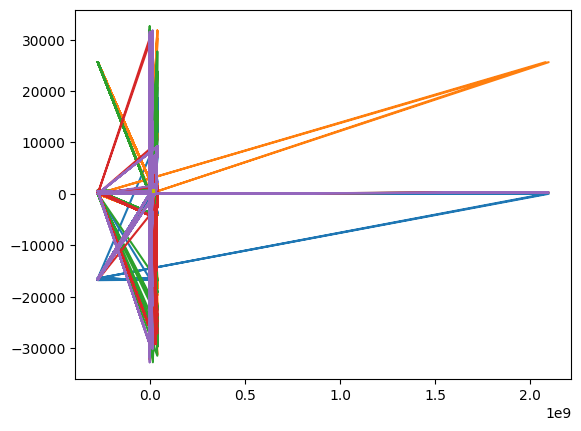

In [11]:
#make plots

fig, ax = plt.subplots()

#plot tank temperatures
x = [log.time for log in sensor_data_arr]
ax.plot(x, [log.t_t1  for log in sensor_data_arr])
ax.plot(x, [log.t_t2 for log in sensor_data_arr])
ax.plot(x, [log.c_t1 for log in sensor_data_arr])
ax.plot(x, [log.c_t2 for log in sensor_data_arr])
ax.plot(x, [log.c_t3 for log in sensor_data_arr])

ax.vlines([log.time for log in state_change_arr], 200, 1000, colors='y')
#ax.vlines([log.time for log in msg_sent_arr], 0, 1000, colors='g')
plt.show()

[1564, 2564, 3566, 4567, 4833, 4893, 4948, 4998, 5050, 5111, 5161, 5213, 5264, 5314, 5366, 5417, 5467, 5519, 5569, 5621, 5671, 5722, 5773, 5825, 5876, 5926, 5978, 6029, 6080, 6130, 6181, 6233, 6284, 6335, 6386, 6437, 6488, 6539, 6589, 6641, 6692, 6743, 6794, 6845, 6911, 6962, 7013, 7064, 7115, 7166, 7217, 7268, 7319, 7370, 7421, 7472, 7523, 7574, 7625, 7675, 7737, 7787, 7839, 7889, 7941, 7992, 8043, 8094, 8144, 8195, 8246, 8298, 8349, 8399, 8450, 8501, 8553, 8604, 8655, 8706, 8757, 8808, 8873, 8925, 8976, 9027, 9078, 9129, 9180, 9231, 9282, 9333, 9384, 9434, 9486, 9536, 9588, 9639, 9689, 9740, 9795, 9845, 9897, 9947, 9999, 10059, 10109, 10162, 10213, 10264, 10315, 10365, 10416, 10467, 10518, 10570, 10621, 10686, 10737, 10788, 10839, 10890, 10941, 10991, 11043, 11094, 11145, 11195, 11247, 11298, 11349, 11399, 11450, 11501, 11553, 11603, 11655, 11705, 11757, 11807, 11858, 11909, 11960, 12012, 12063, 12114, 12164, 12215, 12267, 12317, 12368, 12420, 12471, 12522, 12573, 12624, 12675, 12726

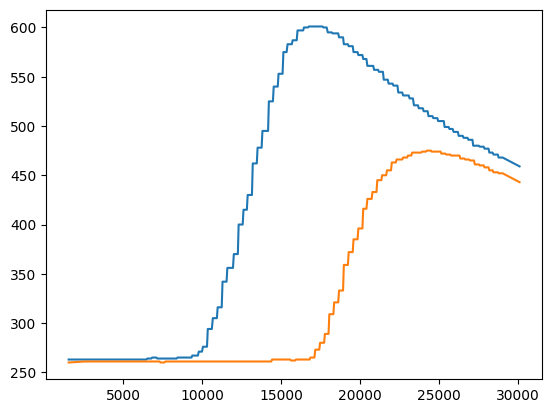

In [50]:
#make plots

fig, ax = plt.subplots()

#plot tank temperatures
x = [log.time for log in msg_sent_arr if log.cmd == 0]
y1 = [int.from_bytes(log.data[1 : 3], byteorder='big', signed=True) for log in msg_sent_arr if log.cmd == 0]
y2 = [int.from_bytes(log.data[3 : 5], byteorder='big', signed=True) for log in msg_sent_arr if log.cmd == 0]

print(x)

ax.plot(x, y1)
ax.plot(x, y2)

plt.show()